In [1]:
!pip install transformers datasets accelerate peft
!pip install bitsandbytes


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 131.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of PhiForSequenceClassification were not initialized from the model checkpoint at microsoft/phi-2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/1267 [00:00<?, ? examples/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-4-26dc67b0f05a>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=args, tokenizer=tokenizer)



LIAR — Best Threshold based on F1:
Threshold    0.300000
Precision    0.420635
Recall       0.708241
F1           0.527801
Accuracy     0.550908
Name: 4, dtype: float64


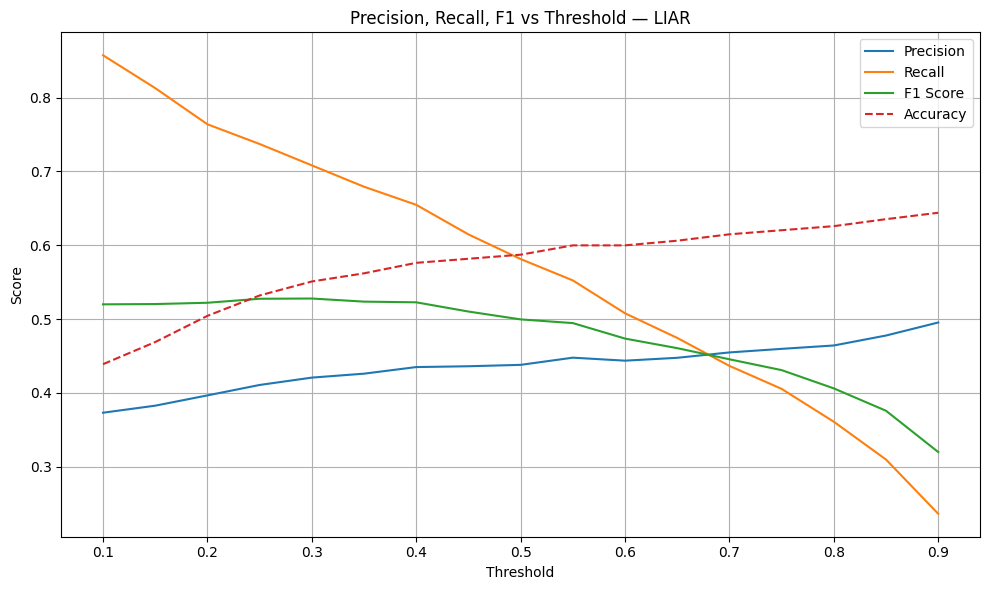

LIAR AUROC: 0.6116


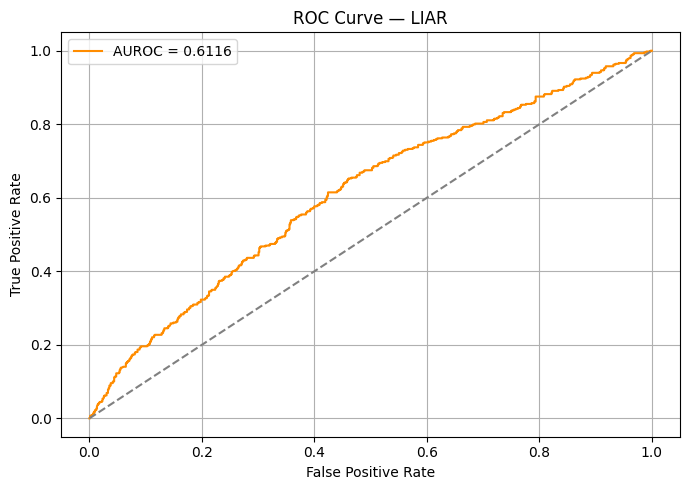

<Figure size 600x500 with 0 Axes>

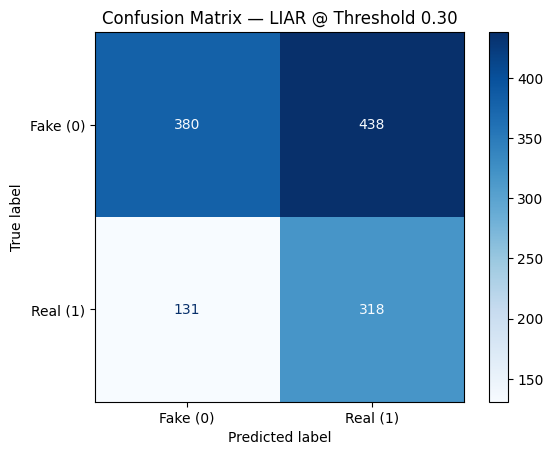

Predictions saved to liar_phi2_predictions.csv


Map:   0%|          | 0/85 [00:00<?, ? examples/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-4-26dc67b0f05a>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=args, tokenizer=tokenizer)



FakeNewsNet — Best Threshold based on F1:
Threshold    0.100000
Precision    0.474359
Recall       0.880952
F1           0.616667
Accuracy     0.458824
Name: 0, dtype: float64


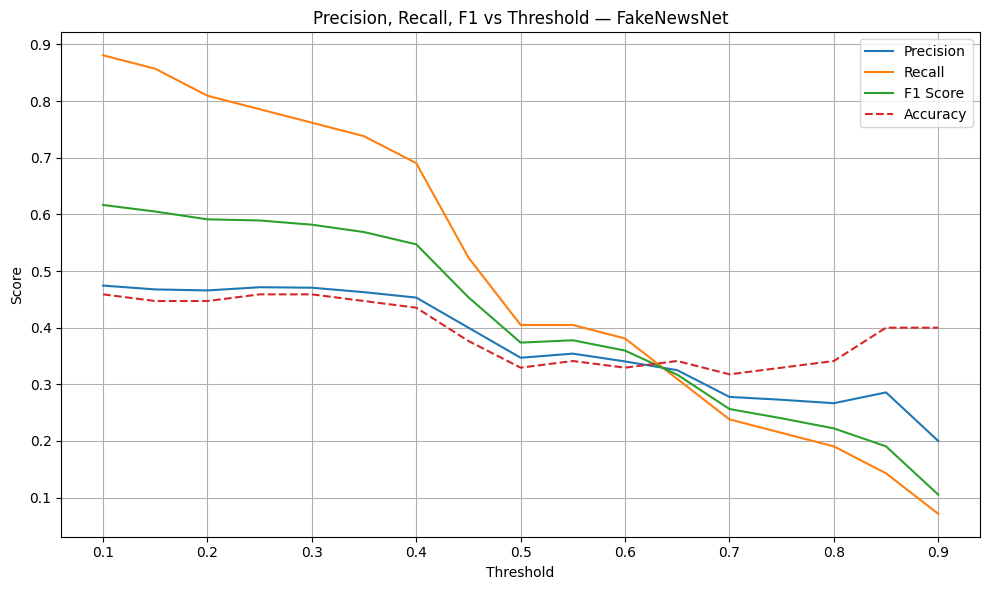

FakeNewsNet AUROC: 0.3032


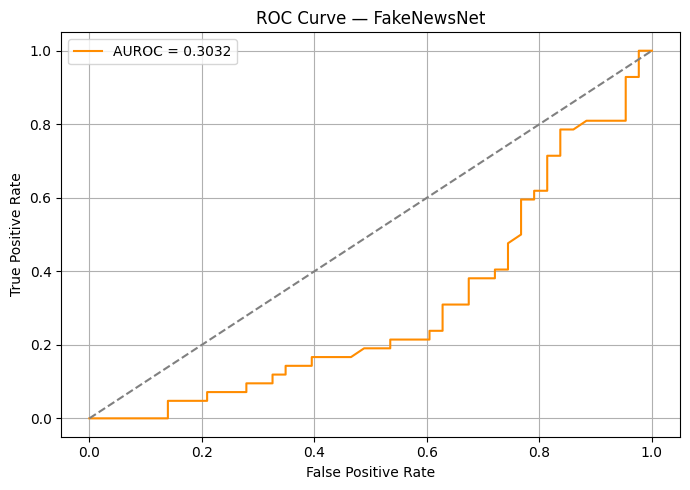

<Figure size 600x500 with 0 Axes>

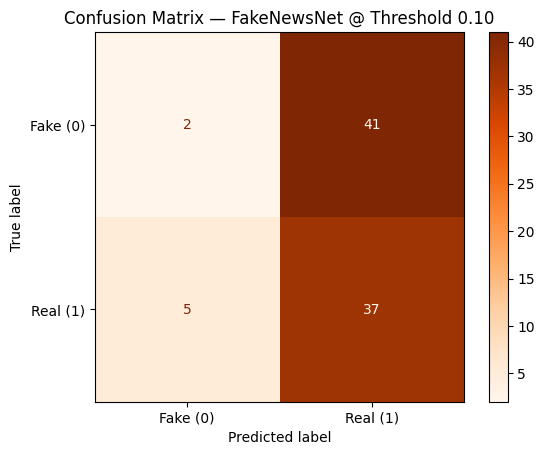

Predictions saved to fakenewsnet_phi2_predictions.csv


In [4]:

import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    BitsAndBytesConfig
)
from peft import PeftModel
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)

os.environ["WANDB_DISABLED"] = "true"
model_path = "/content/drive/MyDrive/misinfo_project/models/phi2_final"
tokenizer = AutoTokenizer.from_pretrained(model_path, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

base_model = AutoModelForSequenceClassification.from_pretrained(
    "microsoft/phi-2",
    quantization_config=bnb_config,
    num_labels=2,
    trust_remote_code=True,
    device_map="auto"
)

model = AutoModelForSequenceClassification.from_pretrained(
    "/content/drive/MyDrive/misinfo_project/models/phi2_final",
    device_map="auto",
    trust_remote_code=True,
    torch_dtype=torch.float16
)
model.eval()

def evaluate_thresholds_and_roc(df_path, dataset_name):
    df = pd.read_csv(df_path).dropna(subset=["text", "label"])
    df["label"] = df["label"].astype(int)

    def tokenize(example):
        return tokenizer(example["text"], truncation=True, padding="max_length", max_length=256)

    dataset = Dataset.from_pandas(df).map(tokenize, batched=True)
    dataset = dataset.remove_columns(["text"])
    dataset.set_format("torch")

    args = TrainingArguments(output_dir="./eval_temp", per_device_eval_batch_size=4, fp16=True)
    trainer = Trainer(model=model, args=args, tokenizer=tokenizer)
    predictions = trainer.predict(dataset)

    logits = torch.tensor(predictions.predictions)
    probs = torch.softmax(logits, dim=1)[:, 1].numpy()
    labels = predictions.label_ids

    thresholds = np.arange(0.1, 0.95, 0.05)
    metrics = []
    for t in thresholds:
        preds = (probs >= t).astype(int)
        precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary", zero_division=0)
        acc = accuracy_score(labels, preds)
        metrics.append((t, precision, recall, f1, acc))

    df_metrics = pd.DataFrame(metrics, columns=["Threshold", "Precision", "Recall", "F1", "Accuracy"])
    best = df_metrics.iloc[df_metrics["F1"].idxmax()]

    print(f"\n{dataset_name} — Best Threshold based on F1:")
    print(best)

    plt.figure(figsize=(10, 6))
    plt.plot(df_metrics["Threshold"], df_metrics["Precision"], label="Precision")
    plt.plot(df_metrics["Threshold"], df_metrics["Recall"], label="Recall")
    plt.plot(df_metrics["Threshold"], df_metrics["F1"], label="F1 Score")
    plt.plot(df_metrics["Threshold"], df_metrics["Accuracy"], label="Accuracy", linestyle="--")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(f"Precision, Recall, F1 vs Threshold — {dataset_name}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # AUROC & ROC Curve
    auroc = roc_auc_score(labels, probs)
    fpr, tpr, _ = roc_curve(labels, probs)

    print(f"{dataset_name} AUROC: {auroc:.4f}")
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label=f"AUROC = {auroc:.4f}", color="darkorange")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve — {dataset_name}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    preds_best = (probs >= best["Threshold"]).astype(int)
    cm = confusion_matrix(labels, preds_best)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake (0)", "Real (1)"])
    cmap = "Blues" if dataset_name.lower() == "liar" else "Oranges"
    plt.figure(figsize=(6, 5))
    disp.plot(cmap=cmap, values_format="d")
    plt.title(f"Confusion Matrix — {dataset_name} @ Threshold {best['Threshold']:.2f}")
    plt.grid(False)
    plt.show()


    df_out = pd.DataFrame({
        "true_label": labels,
        "probability_real": probs,
        "predicted_label": preds_best
    })
    df_out.to_csv(f"{dataset_name.lower()}_phi2_predictions.csv", index=False)
    print(f"Predictions saved to {dataset_name.lower()}_phi2_predictions.csv")


evaluate_thresholds_and_roc("/content/drive/MyDrive/misinfo_project/liar/liar_test.csv", "LIAR")
evaluate_thresholds_and_roc("/content/drive/MyDrive/misinfo_project/fakenewsnet/fakenewsnet_test.csv", "FakeNewsNet")
